## Read and explore Dataset

#### Fertility data set: 100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm Diagnosis are related to socio-demographic data, environmental factors, health status, and life habits


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("fertility.csv")
df.head()


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


* Data set have 100 records and 9 features

## Preprocessing

* Check for null values in any column

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


* There is no null values in any column 
* we need to encode categorical features by transforming it into quantitative values to deal with it in a better way.

In [3]:
cols = df.columns
columns = df.columns.to_numpy()
categorical_columns = np.setdiff1d(columns,np.array(["Age", "Number of hours spent sitting per day"]))

categories = [ list(df[i].unique()) for i in categorical_columns]

# View each categorical Feature with its unique categories

for i , feature_name in enumerate(categorical_columns):
    print(feature_name.ljust(35), categories[i])


Accident or serious trauma          ['yes', 'no']
Childish diseases                   ['no', 'yes']
Diagnosis                           ['Normal', 'Altered']
Frequency of alcohol consumption    ['once a week', 'hardly ever or never', 'several times a week', 'several times a day', 'every day']
High fevers in the last year        ['more than 3 months ago', 'less than 3 months ago', 'no']
Season                              ['spring', 'fall', 'winter', 'summer']
Smoking habit                       ['occasional', 'daily', 'never']
Surgical intervention               ['yes', 'no']


* We encode all the categorical features for example ```Surgical intervention``` we can encode ```yes``` into ```1``` , ```no``` into `0` 

In [4]:
df['Surgical intervention'].replace({"yes":1,"no":0},inplace=True)
df['Childish diseases'].replace({"yes":1,"no":0},inplace=True)
df['Accident or serious trauma'].replace({"yes":1,"no":0},inplace=True)

df['Diagnosis'].replace({"Normal":1,"Altered":0},inplace=True)
df['Frequency of alcohol consumption'].replace({"once a week":1,"hardly ever or never":0,"several times a week":2,'several times a day':3, 'every day':4}, inplace= True)
df['High fevers in the last year'].replace({"more than 3 months ago":2,"less than 3 months ago":1,"no":0}, inplace= True)
df['Smoking habit'].replace({"daily":2, "occasional":1,"never":0}, inplace= True)

#df['Season'].replace({"winter":2, "spring":1, "summer":3, "fall":4 }, inplace= True)




In [5]:
cols = df.columns
columns = df.columns.to_numpy()
categorical_columns = np.setdiff1d(columns,np.array(["Age", "Number of hours spent sitting per day"]))

categories = [ list(df[i].unique()) for i in categorical_columns]

# View each categorical Feature with its unique categories

for i , feature_name in enumerate(categorical_columns):
    print(feature_name.ljust(35), categories[i])

Accident or serious trauma          [1, 0]
Childish diseases                   [0, 1]
Diagnosis                           [1, 0]
Frequency of alcohol consumption    [1, 0, 2, 3, 4]
High fevers in the last year        [2, 1, 0]
Season                              ['spring', 'fall', 'winter', 'summer']
Smoking habit                       [1, 2, 0]
Surgical intervention               [1, 0]


* Season categorical feature is not an ordinal type of data , so we encode it using one hot encoding technique.

In [6]:
from sklearn.preprocessing import OneHotEncoder;
enc = OneHotEncoder(dtype=np.int)
encoded = enc.fit_transform(df.Season.values.reshape(-1,1)).toarray()
newFeatures = pd.DataFrame(encoded,columns=["Season_"+ str(i) for i in range(encoded.shape[1])])
# add new features
df = pd.concat([df,newFeatures],axis=1)
# drop season feature
df = df.drop(['Season'],axis=1)

* Now all the categorical Features are encoded

In [7]:
df.head()

,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis,Season_0,Season_1,Season_2,Season_3
0,30,0,1,1,2,1,1,16,1,0,1,0,0
1,35,1,0,1,2,1,2,6,0,0,1,0,0
2,27,1,0,0,2,0,0,9,1,0,1,0,0
3,32,0,1,1,2,0,0,7,1,0,1,0,0
4,30,1,1,0,2,1,0,9,0,0,1,0,0


* We then visually check quantitave features for outliers 

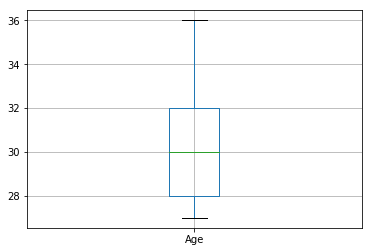

In [8]:
df.boxplot(column=["Age"])

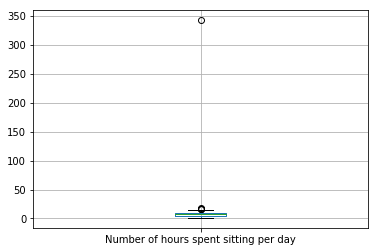

In [9]:
df.boxplot(column=["Number of hours spent sitting per day"])

* We notice that ```Number of hours spent sitting per day``` has outlier data point with value bigger than 50 and near 350 
* This data point is not correct as ```Number of hours spent sitting per day``` cannot exceed 24 hours 

In [10]:
df[df["Number of hours spent sitting per day"] > 24  ]

,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis,Season_0,Season_1,Season_2,Season_3
50,30,1,0,1,2,1,0,342,1,0,1,0,0


* So we drop record 50

In [11]:
df = df.drop(50)

## Exploration and Visualization

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis,Season_0,Season_1,Season_2,Season_3
Age,1.000000,0.099092,0.236236,0.255766,0.011232,0.202826,0.076843,-0.424959,-0.091831,-0.023696,0.084110,0.126843,-0.120894
Childish diseases,0.099092,1.000000,0.167188,-0.145617,-0.118873,-0.039325,0.094070,-0.136739,0.038876,-0.188904,0.045216,0.079779,0.111347
Accident or serious trauma,0.236236,0.167188,1.000000,0.112938,0.043169,0.245462,0.103678,0.012317,0.145330,-0.165588,0.295804,-0.080296,-0.110331
Surgical intervention,0.255766,-0.145617,0.112938,1.000000,0.268665,0.050204,-0.045824,-0.188079,-0.058150,0.014961,0.034362,-0.104676,-0.006344
High fevers in the last year,0.011232,-0.118873,0.043169,0.268665,1.000000,0.020275,0.009535,-0.022208,-0.065373,0.253528,-0.008585,0.036119,-0.267690
Frequency of alcohol consumption,0.202826,-0.039325,0.245462,0.050204,0.020275,1.000000,0.217076,-0.090372,-0.145604,0.026274,0.045594,-0.082922,-0.039501
Smoking habit,0.076843,0.094070,0.103678,-0.045824,0.009535,0.217076,1.000000,-0.112173,-0.043050,-0.036574,0.061573,-0.039856,-0.010680
Number of hours spent sitting per day,-0.424959,-0.136739,0.012317,-0.188079,-0.022208,-0.090372,-0.112173,1.000000,-0.023868,-0.033594,0.163092,-0.121510,-0.086482
Diagnosis,-0.091831,0.038876,0.145330,-0.058150,-0.065373,-0.145604,-0.043050,-0.023868,1.000000,-0.149647,0.023395,-0.080971,0.164509
Season_0,-0.023696,-0.188904,-0.165588,0.014961,0.253528,0.026274,-0.036574,-0.033594,-0.149647,1.000000,-0.510396,-0.138546,-0.424010


## Processing: Splitting Dataset and Building Models

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop("Diagnosis",axis= 1)
Y = df["Diagnosis"]

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [36]:
from sklearn import naive_bayes , tree , svm , ensemble

nv = naive_bayes.GaussianNB()
dt = tree.DecisionTreeClassifier()
sv = svm.SVC()
rf = ensemble.RandomForestClassifier(n_estimators=100)

classifiers = {"Gaussian Naive Bayes":nv,"Decision Tree":dt,"SVM":sv,"Random Forest":rf}
score = {}

for k,v in classifiers.items():
    v.fit(x_train,y_train)
    score[k] = v.score(x_test,y_test) * 100

score_table = pd.DataFrame.from_dict(score, orient='index',columns=["Accuarcy %"])
score_table.sort_values(by=["Accuarcy %"],ascending=True,axis=0,inplace=True)
score_table



,Accuarcy %
Decision Tree,80.0
Gaussian Naive Bayes,88.0
SVM,92.0
Random Forest,96.0
